<a href="https://colab.research.google.com/github/solankybasant/demo/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sn

mpl.rcParams["figure.figsize"] = (18,6)
mpl.rcParams["axes.grid"] = True

In [ ]:
data = pd.read_csv('/content/Sentiment_Analysis_Combined.csv')

In [ ]:
data.head()

,Date,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [ ]:
# df = data.drop(columns = ["Label"])
df = data
df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)
df.head()

,Date,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1989 non-null   datetime64[ns]
 1   Adj Close     1989 non-null   float64       
 2   Label         1989 non-null   int64         
 3   Open          1989 non-null   float64       
 4   High          1989 non-null   float64       
 5   Low           1989 non-null   float64       
 6   Volume        1989 non-null   int64         
 7   Subjectivity  1989 non-null   float64       
 8   Polarity      1989 non-null   float64       
 9   compound      1989 non-null   float64       
 10  neg           1989 non-null   float64       
 11  pos           1989 non-null   float64       
 12  neu           1989 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 202.1 KB


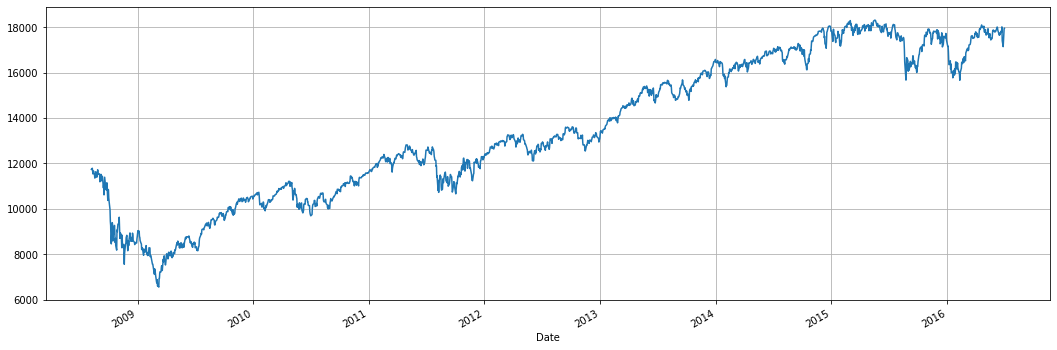

In [ ]:
df.set_index('Date')["Adj Close"].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7043395c90>,
      dtype=object)

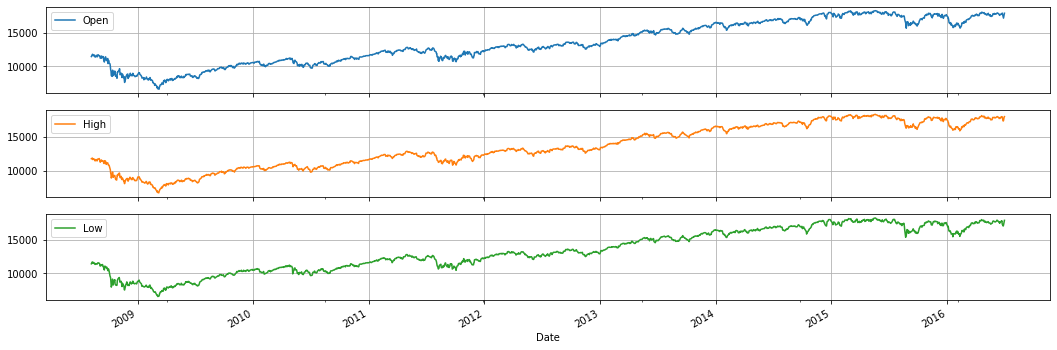

In [ ]:
df.set_index('Date')[["Open", "High", "Low"]].plot(subplots=True)

In [ ]:
df_input = df.drop(columns=["Date"])
df_input.head()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [ ]:
df_input.describe()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,13463.032255,0.535445,13459.116048,13541.303173,13372.931728,1.628110e+08,0.361426,0.022722,-0.957369,0.162315,0.065675,0.772018
std,3144.006996,0.498867,3143.281634,3136.271725,3150.420934,9.392343e+07,0.060884,0.053687,0.199673,0.038575,0.020968,0.041819
min,6547.049805,0.000000,6547.009766,6709.609863,6469.950195,8.410000e+06,0.161332,-0.225978,-0.999500,0.059000,0.007000,0.588000
25%,10913.379883,0.000000,10907.339844,11000.980469,10824.759766,1.000000e+08,0.321410,-0.011461,-0.996400,0.135000,0.051000,0.746000
50%,13025.580078,1.000000,13022.049805,13088.110352,12953.129883,1.351700e+08,0.361652,0.024870,-0.993200,0.159000,0.064000,0.773000
75%,16478.410156,1.000000,16477.699219,16550.070312,16392.769531,1.926000e+08,0.400533,0.057980,-0.985500,0.188000,0.079000,0.802000
max,18312.390625,1.000000,18315.060547,18351.359375,18272.560547,6.749200e+08,0.615242,0.195774,0.991700,0.316000,0.153000,0.894000


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_input)

In [ ]:
features = df_scaled
target = df_scaled[:,1]

<center>features is a 2D list, target is a 1D list

In [ ]:
def plotHist(history : tf.keras.callbacks.History):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'test'], loc='upper left')

In [ ]:
len(features), len(features[0]), len(target)

(1989, 12, 1989)

In [ ]:
df_input.head()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [ ]:
features[0]

array([4.40894198e-01, 1.00000000e+00, 4.15113783e-01, 4.33813671e-01,
       4.16695095e-01, 3.06702075e-01, 2.34004623e-01, 4.20649400e-01,
       6.52872640e-04, 6.84824903e-01, 2.32876712e-01, 4.44444444e-01])

In [ ]:
target[0:2]

array([1., 0.])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42, shuffle=False)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1491, 12), (498, 12), (1491,), (498,))

In [ ]:
win_len = 30
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [ ]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 46
number of batches in testing set : 15
batch size : 32
window size : 30
number of features : 12


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
train_generator[0][0].shape

(32, 30, 12)

<center><h3>Model 1


In [ ]:
# input_shape = x_train.shape[1:]
input_shape = (win_len, num_features)

model1 = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
model1.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

# model.fit(
#     train_generator,
#     y_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=64,
#     callbacks=callbacks,
# )

model1.fit_generator(train_generator, epochs=150, validation_data=test_generator)

# model.evaluate(x_test, y_test, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 30, 12)      24          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 30, 12)      52236       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/150
46/46 [==============================] - 14s 30ms/step - loss: 1.5611 - val_loss: 0.7137
Epoch 2/150
46/46 [==============================] - 1s 19ms/step - loss: 1.1336 - val_loss: 0.6961
Epoch 3/150
46/46 [==============================] - 1s 18ms/step - loss: 0.8684 - val_loss: 0.6953
Epoch 4/150
46/46 [==============================] - 1s 17ms/step - loss: 0.8966 - val_loss: 0.6978
Epoch 5/150
46/46 [==============================] - 1s 18ms/step - loss: 0.9463 - val_loss: 0.7053
Epoch 6/150
46/46 [==============================] - 1s 18ms/step - loss: 0.8646 - val_loss: 0.7053
Epoch 7/150
46/46 [==============================] - 1s 18ms/step - loss: 1.5413 - val_loss: 0.7101
Epoch 8/150
46/46 [==============================] - 1s 18ms/step - loss: 0.8496 - val_loss: 0.7007
Epoch 9/150
46/46 [==============================] - 1s 18ms/step - loss: 0.8170 - val_loss: 0.7098
Epoch 10/150
46/46 [==============================] - 1s 21ms/step - loss: 0.7945 - val_loss: 0.705

In [ ]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model1.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
history = model1.fit(train_generator, epochs=150, validation_data=test_generator, shuffle=False, callbacks = [checkpoint])

Epoch 1/150
46/46 [==============================] - ETA: 0s - loss: 0.7432 - accuracy: 0.5133
Epoch 1: val_accuracy improved from -inf to 0.48504, saving model to clas_logs\model1.hdf5
46/46 [==============================] - 5s 31ms/step - loss: 0.7432 - accuracy: 0.5133 - val_loss: 0.7392 - val_accuracy: 0.4850
Epoch 2/150
43/46 [===========================>..] - ETA: 0s - loss: 0.7709 - accuracy: 0.5189
Epoch 2: val_accuracy did not improve from 0.48504
46/46 [==============================] - 1s 18ms/step - loss: 0.7680 - accuracy: 0.5195 - val_loss: 0.7829 - val_accuracy: 0.4850
Epoch 3/150
46/46 [==============================] - ETA: 0s - loss: 0.7337 - accuracy: 0.5106
Epoch 3: val_accuracy did not improve from 0.48504
46/46 [==============================] - 1s 18ms/step - loss: 0.7337 - accuracy: 0.5106 - val_loss: 0.7439 - val_accuracy: 0.4850
Epoch 4/150
43/46 [===========================>..] - ETA: 0s - loss: 0.7252 - accuracy: 0.4949
Epoch 4: val_accuracy did not improve

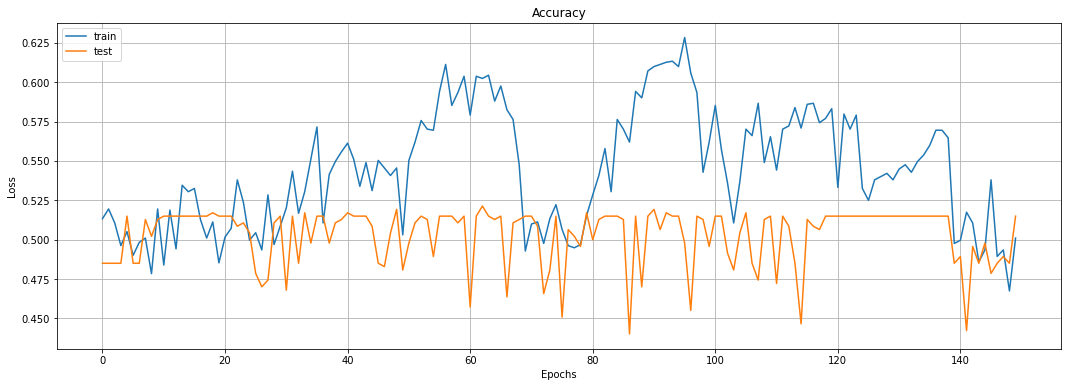

In [ ]:
plotHist(history)

In [ ]:
model1 = tf.keras.models.load_model("/content/clas_logs\model1.hdf5")

In [ ]:
predictions = model1.predict(test_generator)

15/15 [==============================] - 1s 6ms/step


In [ ]:
predictions

array([[0.55898005],
       [0.55576694],
       [0.55722904],
       [0.56497806],
       [0.56124616],
       [0.54846686],
       [0.5528972 ],
       [0.55185914],
       [0.5459508 ],
       [0.55582273],
       [0.54945374],
       [0.5495547 ],
       [0.5465469 ],
       [0.5479709 ],
       [0.560831  ],
       [0.5550411 ],
       [0.55641633],
       [0.5574602 ],
       [0.5595236 ],
       [0.5468044 ],
       [0.54597414],
       [0.55339026],
       [0.5544524 ],
       [0.55281126],
       [0.55561167],
       [0.5495525 ],
       [0.5496601 ],
       [0.54751575],
       [0.5529989 ],
       [0.5439819 ],
       [0.5668669 ],
       [0.5602032 ],
       [0.5600237 ],
       [0.56336004],
       [0.5528577 ],
       [0.5517632 ],
       [0.5492976 ],
       [0.5720175 ],
       [0.5360272 ],
       [0.54002595],
       [0.5384144 ],
       [0.5425414 ],
       [0.5631926 ],
       [0.562437  ],
       [0.5704126 ],
       [0.5689704 ],
       [0.5437416 ],
       [0.541

In [ ]:
predictions.shape

(468, 1)

In [ ]:
x_test[:,1][win_len:].shape

(468,)

In [ ]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,1.0,0.0


In [ ]:
#function to print accuracy and MCC of the model
def evaluation(df : pd.DataFrame):
    conf = pd.crosstab(df["Actual"], df["Pred"])
    fig = plt.figure(figsize = (6,4))
    sn.heatmap(conf, annot = True, cmap = "Blues", fmt = "g")
    plt.title("Confussion Matrix")
    fig.tight_layout()
    plt.show()
    TP = conf[1][1]
    FN = conf[0][1]
    FP = conf[1][0]
    TN = conf[0][0]
    Acc = (TP+TN)/(TP+TN+FN+FP)
    Mcc = (TP*TN - FP*FN) / np.sqrt( (TP + FP)*(TP + FN)*(TN + FP)*(TN + FN) )
    print("Accuracy =",Acc)
    print("MCC =",Mcc)


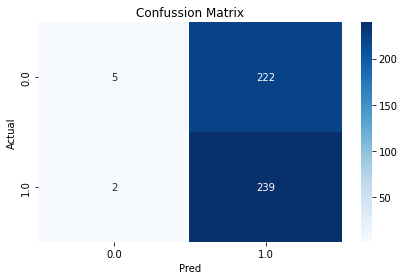

Accuracy = 0.5213675213675214
MCC = 0.0565221930986891


In [ ]:
evaluation(df_pred)

<center><h2>Model 2 

In [ ]:
# input_shape = x_train.shape[1:]
input_shape = (win_len, num_features)

model2 = build_model(
    input_shape,
    head_size=350,
    num_heads=8,
    ff_dim=4,
    num_transformer_blocks=6,
    mlp_units=[200],
    mlp_dropout=0.4,
    dropout=0.25,
)

model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
model2.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

# model.fit(
#     train_generator,
#     y_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=64,
#     callbacks=callbacks,
# )

model2.fit_generator(train_generator, epochs=150, validation_data=test_generator)

# model.evaluate(x_test, y_test, verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 30, 12)      24          ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 30, 12)      142812      ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


46/46 [==============================] - 7s 51ms/step - loss: 4.5902 - val_loss: 0.7016
Epoch 2/150
46/46 [==============================] - 2s 42ms/step - loss: 3.5698 - val_loss: 7.3965
Epoch 3/150
46/46 [==============================] - 2s 46ms/step - loss: 3.8327 - val_loss: 0.7523
Epoch 4/150
46/46 [==============================] - 3s 54ms/step - loss: 3.5272 - val_loss: 0.7304
Epoch 5/150
46/46 [==============================] - 2s 54ms/step - loss: 3.5556 - val_loss: 0.9798
Epoch 6/150
46/46 [==============================] - 2s 46ms/step - loss: 2.7355 - val_loss: 0.7924
Epoch 7/150
46/46 [==============================] - 2s 37ms/step - loss: 2.7414 - val_loss: 0.7065
Epoch 8/150
46/46 [==============================] - 2s 38ms/step - loss: 2.6143 - val_loss: 0.7077
Epoch 9/150
46/46 [==============================] - 2s 49ms/step - loss: 2.5690 - val_loss: 0.7087
Epoch 10/150
46/46 [==============================] - 2s 37ms/step - loss: 2.4208 - val_loss: 0.7069
Epoch 11/15

In [ ]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model2.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
history2 = model2.fit(train_generator, epochs=200, validation_data=test_generator, shuffle=False, callbacks = [checkpoint])

Epoch 1/200
45/46 [============================>.] - ETA: 0s - loss: 1.2528 - accuracy: 0.5076
Epoch 1: val_accuracy improved from -inf to 0.51496, saving model to clas_logs\model2.hdf5
46/46 [==============================] - 8s 56ms/step - loss: 1.2443 - accuracy: 0.5086 - val_loss: 1.2750 - val_accuracy: 0.5150
Epoch 2/200
45/46 [============================>.] - ETA: 0s - loss: 1.3799 - accuracy: 0.4840
Epoch 2: val_accuracy did not improve from 0.51496
46/46 [==============================] - 2s 37ms/step - loss: 1.3727 - accuracy: 0.4839 - val_loss: 0.8832 - val_accuracy: 0.4850
Epoch 3/200
45/46 [============================>.] - ETA: 0s - loss: 1.8154 - accuracy: 0.4944
Epoch 3: val_accuracy improved from 0.51496 to 0.52778, saving model to clas_logs\model2.hdf5
46/46 [==============================] - 2s 42ms/step - loss: 1.8130 - accuracy: 0.4949 - val_loss: 0.6935 - val_accuracy: 0.5278
Epoch 4/200
45/46 [============================>.] - ETA: 0s - loss: 1.7991 - accuracy: 0

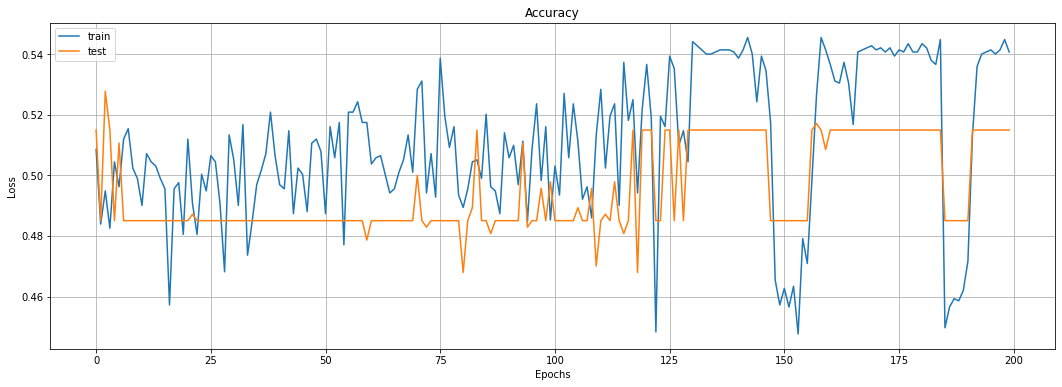

In [ ]:
plotHist(history2)

In [ ]:
model2 = tf.keras.models.load_model("/content/clas_logs\model2.hdf5")

In [ ]:
predictions2 = model2.predict(test_generator)

15/15 [==============================] - 1s 16ms/step


In [ ]:
predictions2

array([[0.5535327 ],
       [0.5506118 ],
       [0.54666513],
       [0.5483796 ],
       [0.5456146 ],
       [0.5352675 ],
       [0.56208104],
       [0.531432  ],
       [0.52815723],
       [0.55096555],
       [0.5172801 ],
       [0.5593196 ],
       [0.503261  ],
       [0.5423986 ],
       [0.5512324 ],
       [0.5178233 ],
       [0.49532062],
       [0.56557244],
       [0.51217926],
       [0.5119808 ],
       [0.5325368 ],
       [0.50876784],
       [0.5410707 ],
       [0.520125  ],
       [0.54906374],
       [0.50922567],
       [0.53966725],
       [0.5346074 ],
       [0.5572576 ],
       [0.53136027],
       [0.5586558 ],
       [0.5380905 ],
       [0.56935483],
       [0.5489971 ],
       [0.5682056 ],
       [0.5336119 ],
       [0.5747488 ],
       [0.57046336],
       [0.55387723],
       [0.5860741 ],
       [0.5560387 ],
       [0.5777422 ],
       [0.5581887 ],
       [0.5540468 ],
       [0.5640474 ],
       [0.5701609 ],
       [0.5445462 ],
       [0.563

In [ ]:
predictions2.shape

(468, 1)

In [ ]:
x_test[:,1][win_len:].shape

(468,)

In [ ]:
df_pred2 = pd.concat([pd.DataFrame(np.round(predictions2)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred2.columns = ["Pred", "Actual"]
df_pred2.head()

,Pred,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,1.0,0.0


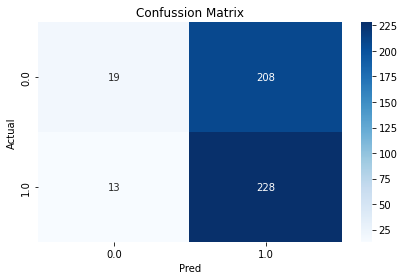

Accuracy = 0.5277777777777778
MCC = 0.058927052285185404


In [ ]:
evaluation(df_pred2)

<center><h3>Model 3

In [ ]:
# input_shape = x_train.shape[1:]
input_shape = (win_len, num_features)

model3 = build_model(
    input_shape,
    head_size=450,
    num_heads=9,
    ff_dim=9,
    num_transformer_blocks=9,
    mlp_units=[250],
    mlp_dropout=0.4,
    dropout=0.25,
)

model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
model3.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

# model.fit(
#     train_generator,
#     y_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=64,
#     callbacks=callbacks,
# )

model3.fit_generator(train_generator, epochs=150, validation_data=test_generator)

# model.evaluate(x_test, y_test, verbose=1)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization_106 (Layer  (None, 30, 12)      24          ['input_9[0][0]']                
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention_53 (Multi  (None, 30, 12)      206562      ['layer_normalization_106[0][0]',
 HeadAttention)                                                   'layer_normalization_106[0][0]']
                                                                                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


46/46 [==============================] - 12s 90ms/step - loss: 4.5309 - val_loss: 7.2726
Epoch 2/150
46/46 [==============================] - 3s 71ms/step - loss: 3.0184 - val_loss: 0.7068
Epoch 3/150
46/46 [==============================] - 3s 72ms/step - loss: 3.0546 - val_loss: 0.7817
Epoch 4/150
46/46 [==============================] - 3s 72ms/step - loss: 3.2859 - val_loss: 7.9432
Epoch 5/150
46/46 [==============================] - 3s 72ms/step - loss: 7.4808 - val_loss: 7.9432
Epoch 6/150
46/46 [==============================] - 3s 72ms/step - loss: 6.3625 - val_loss: 6.9615
Epoch 7/150
46/46 [==============================] - 3s 72ms/step - loss: 5.3543 - val_loss: 4.4934
Epoch 8/150
46/46 [==============================] - 3s 73ms/step - loss: 4.1506 - val_loss: 0.8429
Epoch 9/150
46/46 [==============================] - 3s 74ms/step - loss: 2.4308 - val_loss: 0.8191
Epoch 10/150
46/46 [==============================] - 3s 74ms/step - loss: 2.8294 - val_loss: 0.7188
Epoch 11/1

In [ ]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model3.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
history3 = model3.fit(train_generator, epochs=150, validation_data=test_generator, shuffle=False, callbacks = [checkpoint])

Epoch 1/150
45/46 [============================>.] - ETA: 0s - loss: 6.3286 - accuracy: 0.5333
Epoch 1: val_accuracy improved from -inf to 0.51496, saving model to clas_logs\model3.hdf5
46/46 [==============================] - 12s 98ms/step - loss: 6.3107 - accuracy: 0.5352 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 2/150
45/46 [============================>.] - ETA: 0s - loss: 7.0210 - accuracy: 0.5396
Epoch 2: val_accuracy did not improve from 0.51496
46/46 [==============================] - 3s 71ms/step - loss: 6.9931 - accuracy: 0.5414 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 3/150
45/46 [============================>.] - ETA: 0s - loss: 7.0210 - accuracy: 0.5396
Epoch 3: val_accuracy did not improve from 0.51496
46/46 [==============================] - 3s 71ms/step - loss: 6.9931 - accuracy: 0.5414 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 4/150
45/46 [============================>.] - ETA: 0s - loss: 7.0210 - accuracy: 0.5396
Epoch 4: val_accuracy did not improv

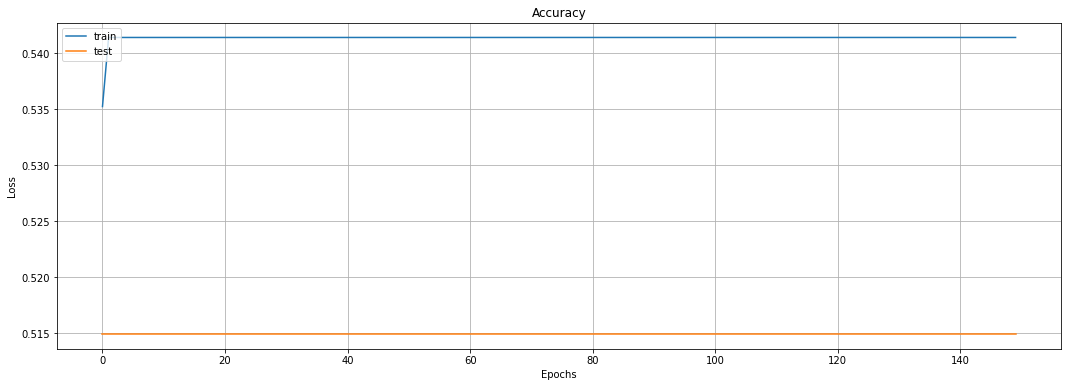

In [ ]:
plotHist(history3)

In [ ]:
model3 = tf.keras.models.load_model("/content/clas_logs\model3.hdf5")

In [ ]:
predictions3 = model3.predict(test_generator)

15/15 [==============================] - 1s 28ms/step


In [ ]:
predictions3

array([[ 9.747593 ],
       [ 9.783359 ],
       [ 9.763592 ],
       [ 9.758897 ],
       [ 9.7247   ],
       [ 9.74351  ],
       [ 9.765233 ],
       [ 9.755658 ],
       [ 9.694031 ],
       [ 9.738562 ],
       [ 9.719694 ],
       [ 9.707327 ],
       [ 9.694519 ],
       [ 9.67099  ],
       [ 9.677248 ],
       [ 9.667394 ],
       [ 9.619271 ],
       [ 9.608254 ],
       [ 9.569378 ],
       [ 9.63227  ],
       [ 9.632567 ],
       [ 9.585481 ],
       [ 9.618376 ],
       [ 9.627742 ],
       [ 9.667226 ],
       [ 9.686107 ],
       [ 9.729934 ],
       [ 9.765457 ],
       [ 9.786975 ],
       [ 9.768919 ],
       [ 9.866006 ],
       [ 9.8955345],
       [ 9.904599 ],
       [ 9.942588 ],
       [ 9.960629 ],
       [ 9.978027 ],
       [ 9.964924 ],
       [ 9.954353 ],
       [ 9.946191 ],
       [ 9.95039  ],
       [ 9.964726 ],
       [10.00547  ],
       [ 9.944361 ],
       [ 9.951421 ],
       [ 9.925909 ],
       [ 9.930319 ],
       [ 9.966446 ],
       [ 9.98

In [ ]:
df_pred3 = pd.concat([pd.DataFrame(np.round(predictions3)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred3.columns = ["Pred", "Actual"]
df_pred3.head()

,Pred,Actual
0,10.0,1.0
1,10.0,1.0
2,10.0,0.0
3,10.0,1.0
4,10.0,0.0


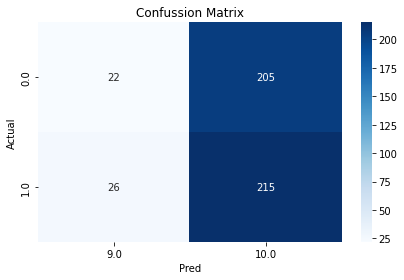

KeyError: ignored

In [ ]:
evaluation(df_pred3)

<center><h3>Model 4

In [ ]:
# input_shape = x_train.shape[1:]
input_shape = (win_len, num_features)

model4 = build_model(
    input_shape,
    head_size=500,
    num_heads=11,
    ff_dim=10,
    num_transformer_blocks=6,
    mlp_units=[300],
    mlp_dropout=0.3,
    dropout=0.25,
)

model4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
model4.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=14, \
    restore_best_weights=True)]

# model.fit(
#     train_generator,
#     y_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=64,
#     callbacks=callbacks,
# )

model4.fit_generator(train_generator, epochs=150, validation_data=test_generator)

# model.evaluate(x_test, y_test, verbose=1)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization_124 (Layer  (None, 30, 12)      24          ['input_10[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention_62 (Multi  (None, 30, 12)      280512      ['layer_normalization_124[0][0]',
 HeadAttention)                                                   'layer_normalization_124[0][0]']
                                                                                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


46/46 [==============================] - 9s 77ms/step - loss: 2.0739 - val_loss: 1.8317
Epoch 2/150
46/46 [==============================] - 3s 63ms/step - loss: 1.7474 - val_loss: 0.7293
Epoch 3/150
46/46 [==============================] - 3s 64ms/step - loss: 1.2199 - val_loss: 0.7069
Epoch 4/150
46/46 [==============================] - 3s 63ms/step - loss: 1.1690 - val_loss: 0.7329
Epoch 5/150
46/46 [==============================] - 3s 64ms/step - loss: 1.0550 - val_loss: 0.7125
Epoch 6/150
46/46 [==============================] - 3s 64ms/step - loss: 2.9659 - val_loss: 0.7073
Epoch 7/150
46/46 [==============================] - 3s 64ms/step - loss: 1.7776 - val_loss: 0.8980
Epoch 8/150
46/46 [==============================] - 3s 65ms/step - loss: 1.3169 - val_loss: 0.7474
Epoch 9/150
46/46 [==============================] - 3s 65ms/step - loss: 1.5141 - val_loss: 0.6978
Epoch 10/150
46/46 [==============================] - 3s 66ms/step - loss: 1.2797 - val_loss: 0.7206
Epoch 11/15

In [ ]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model4.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
history4 = model4.fit(train_generator, epochs=150, validation_data=test_generator, shuffle=False, callbacks = [checkpoint])

Epoch 1/150
45/46 [============================>.] - ETA: 0s - loss: 0.9217 - accuracy: 0.5160
Epoch 1: val_accuracy improved from -inf to 0.51282, saving model to clas_logs\model4.hdf5
46/46 [==============================] - 9s 84ms/step - loss: 0.9176 - accuracy: 0.5175 - val_loss: 0.8053 - val_accuracy: 0.5128
Epoch 2/150
45/46 [============================>.] - ETA: 0s - loss: 5.9221 - accuracy: 0.5403
Epoch 2: val_accuracy improved from 0.51282 to 0.51496, saving model to clas_logs\model4.hdf5
46/46 [==============================] - 3s 69ms/step - loss: 5.9100 - accuracy: 0.5421 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 3/150
45/46 [============================>.] - ETA: 0s - loss: 7.0210 - accuracy: 0.5396
Epoch 3: val_accuracy did not improve from 0.51496
46/46 [==============================] - 3s 62ms/step - loss: 6.9931 - accuracy: 0.5414 - val_loss: 7.3965 - val_accuracy: 0.5150
Epoch 4/150
45/46 [============================>.] - ETA: 0s - loss: 7.0210 - accuracy: 0

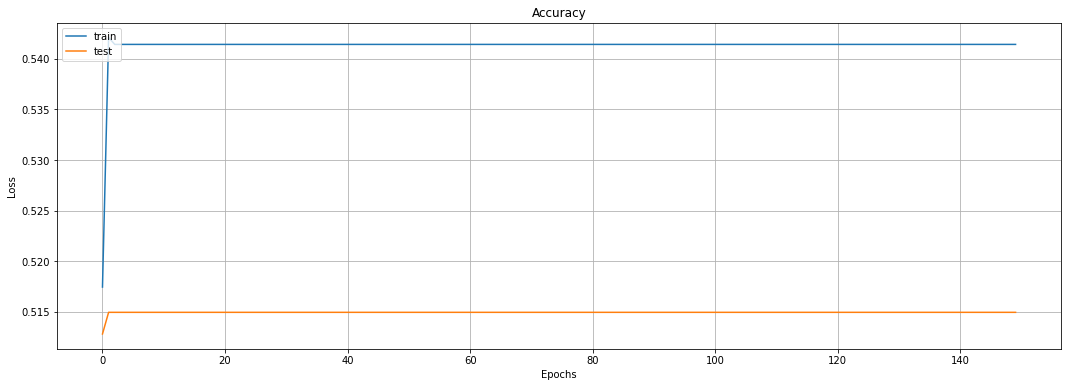

In [ ]:
plotHist(history4)

In [ ]:
model4 = tf.keras.models.load_model("/content/clas_logs\model4.hdf5")

In [ ]:
predictions4 = model4.predict(test_generator)

15/15 [==============================] - 1s 21ms/step


In [ ]:
predictions4

array([[3.3215084],
       [3.4050608],
       [3.2921395],
       [3.4049504],
       [3.2581468],
       [3.3097057],
       [3.313111 ],
       [3.407962 ],
       [3.5901024],
       [3.6665406],
       [3.2929988],
       [3.5433261],
       [3.5703282],
       [3.4948459],
       [3.8510652],
       [3.7977884],
       [4.0752673],
       [4.0210733],
       [4.206144 ],
       [4.032189 ],
       [3.7855654],
       [3.9592848],
       [3.7968845],
       [3.7047477],
       [3.8092325],
       [3.5190825],
       [3.3899846],
       [3.190496 ],
       [3.2095585],
       [3.2945192],
       [3.050312 ],
       [3.1160994],
       [2.8627424],
       [2.9833465],
       [2.7230802],
       [2.8342466],
       [2.5177863],
       [2.4624746],
       [2.5176706],
       [2.7853694],
       [3.0478303],
       [2.9241555],
       [3.12039  ],
       [3.3833241],
       [3.3361518],
       [3.3386874],
       [3.0760844],
       [3.0380304],
       [3.034384 ],
       [3.043663 ],


In [ ]:
df_pred4 = pd.concat([pd.DataFrame(np.round(predictions4)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred4.columns = ["Pred", "Actual"]
df_pred4.head()

,Pred,Actual
0,3.0,1.0
1,3.0,1.0
2,3.0,0.0
3,3.0,1.0
4,3.0,0.0


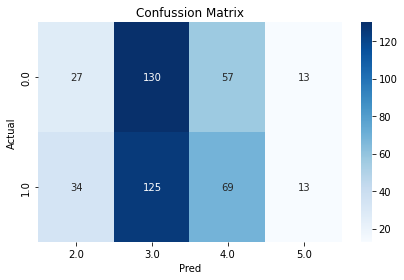

KeyError: ignored

In [ ]:
evaluation(df_pred4)

<center><h3>Model 5

In [ ]:
# input_shape = x_train.shape[1:]
input_shape = (win_len, num_features)

model5 = build_model(
    input_shape,
    head_size=750,
    num_heads=2,
    ff_dim=7,
    num_transformer_blocks=5,
    mlp_units=[600],
    mlp_dropout=0.4,
    dropout=0.25,
)

model5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
model5.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=11, \
    restore_best_weights=True)]

# model.fit(
#     train_generator,
#     y_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=64,
#     callbacks=callbacks,
# )

model5.fit_generator(train_generator, epochs=150, validation_data=test_generator)

# model.evaluate(x_test, y_test, verbose=1)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization_78 (LayerN  (None, 30, 12)      24          ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_39 (Multi  (None, 30, 12)      76512       ['layer_normalization_78[0][0]', 
 HeadAttention)                                                   'layer_normalization_78[0][0]'] 
                                                                                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


46/46 [==============================] - 6s 35ms/step - loss: 1.4427 - val_loss: 0.7026
Epoch 2/150
46/46 [==============================] - 1s 22ms/step - loss: 0.8398 - val_loss: 0.7056
Epoch 3/150
46/46 [==============================] - 1s 22ms/step - loss: 0.8480 - val_loss: 0.7390
Epoch 4/150
46/46 [==============================] - 1s 22ms/step - loss: 0.7465 - val_loss: 0.6963
Epoch 5/150
46/46 [==============================] - 1s 22ms/step - loss: 0.7679 - val_loss: 0.7034
Epoch 6/150
46/46 [==============================] - 1s 23ms/step - loss: 0.7438 - val_loss: 0.7016
Epoch 7/150
46/46 [==============================] - 1s 22ms/step - loss: 0.7413 - val_loss: 0.7122
Epoch 8/150
46/46 [==============================] - 1s 22ms/step - loss: 0.7426 - val_loss: 0.7127
Epoch 9/150
46/46 [==============================] - 1s 22ms/step - loss: 0.7482 - val_loss: 0.7075
Epoch 10/150
46/46 [==============================] - 1s 22ms/step - loss: 0.7336 - val_loss: 0.7070
Epoch 11/15

In [ ]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model5.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model5.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
history5 = model5.fit(train_generator, epochs=150, validation_data=test_generator, shuffle=False, callbacks = [checkpoint])

Epoch 1/150
46/46 [==============================] - ETA: 0s - loss: 0.9745 - accuracy: 0.5072
Epoch 1: val_accuracy improved from -inf to 0.48504, saving model to clas_logs\model5.hdf5
46/46 [==============================] - 6s 40ms/step - loss: 0.9745 - accuracy: 0.5072 - val_loss: 0.7179 - val_accuracy: 0.4850
Epoch 2/150
46/46 [==============================] - ETA: 0s - loss: 0.7442 - accuracy: 0.5140
Epoch 2: val_accuracy did not improve from 0.48504
46/46 [==============================] - 1s 22ms/step - loss: 0.7442 - accuracy: 0.5140 - val_loss: 1.0791 - val_accuracy: 0.4850
Epoch 3/150
46/46 [==============================] - ETA: 0s - loss: 0.7600 - accuracy: 0.5133
Epoch 3: val_accuracy did not improve from 0.48504
46/46 [==============================] - 1s 22ms/step - loss: 0.7600 - accuracy: 0.5133 - val_loss: 0.7554 - val_accuracy: 0.4850
Epoch 4/150
46/46 [==============================] - ETA: 0s - loss: 0.7299 - accuracy: 0.5086
Epoch 4: val_accuracy did not improve

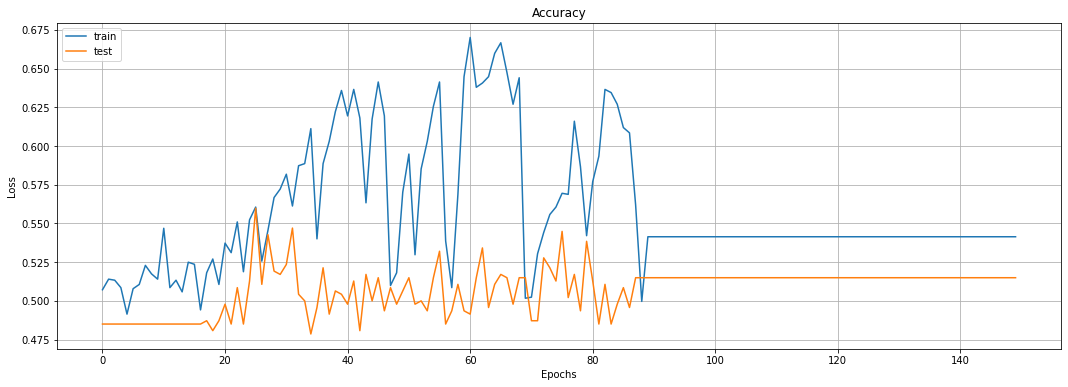

In [ ]:
plotHist(history5)

In [ ]:
model5 = tf.keras.models.load_model("/content/clas_logs\model5.hdf5")

In [ ]:
predictions5 = model5.predict(test_generator)

15/15 [==============================] - 1s 9ms/step


In [ ]:
df_pred5 = pd.concat([pd.DataFrame(np.round(predictions5)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred5.columns = ["Pred", "Actual"]
df_pred5.head()

,Pred,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,1.0,0.0


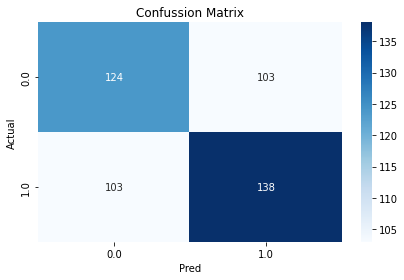

Accuracy = 0.5598290598290598
MCC = 0.11886961449174695


In [ ]:
evaluation(df_pred5)

<center><h3>Model 6

In [ ]:
# input_shape = x_train.shape[1:]
input_shape = (win_len, num_features)

model6 = build_model(
    input_shape,
    head_size=650,
    num_heads=4,
    ff_dim=6,
    num_transformer_blocks=3,
    mlp_units=[900],
    mlp_dropout=0.4,
    dropout=0.25,
)

model6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
model6.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=11, \
    restore_best_weights=True)]

# model.fit(
#     train_generator,
#     y_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=64,
#     callbacks=callbacks,
# )

# model6.fit_generator(train_generator, epochs=150, validation_data=test_generator)

# model.evaluate(x_test, y_test, verbose=1)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization_136 (Layer  (None, 30, 12)      24          ['input_11[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention_68 (Multi  (None, 30, 12)      132612      ['layer_normalization_136[0][0]',
 HeadAttention)                                                   'layer_normalization_136[0][0]']
                                                                                           

In [ ]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model6.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model6.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
history6 = model6.fit(train_generator, epochs=200, validation_data=test_generator, shuffle=False, callbacks = [checkpoint])

Epoch 1/200
46/46 [==============================] - ETA: 0s - loss: 1.0828 - accuracy: 0.4832
Epoch 1: val_accuracy improved from -inf to 0.48504, saving model to clas_logs\model6.hdf5
46/46 [==============================] - 4s 32ms/step - loss: 1.0828 - accuracy: 0.4832 - val_loss: 0.7674 - val_accuracy: 0.4850
Epoch 2/200
44/46 [===========================>..] - ETA: 0s - loss: 0.8356 - accuracy: 0.5270
Epoch 2: val_accuracy improved from 0.48504 to 0.50641, saving model to clas_logs\model6.hdf5
46/46 [==============================] - 1s 22ms/step - loss: 0.8291 - accuracy: 0.5325 - val_loss: 0.6939 - val_accuracy: 0.5064
Epoch 3/200
44/46 [===========================>..] - ETA: 0s - loss: 0.7256 - accuracy: 0.4964
Epoch 3: val_accuracy did not improve from 0.50641
46/46 [==============================] - 1s 19ms/step - loss: 0.7309 - accuracy: 0.4908 - val_loss: 0.8793 - val_accuracy: 0.4850
Epoch 4/200
44/46 [===========================>..] - ETA: 0s - loss: 0.7090 - accuracy: 0

In [ ]:
model6 = tf.keras.models.load_model("/content/clas_logs\model6.hdf5")

In [ ]:
predictions6 = model6.predict(test_generator)

15/15 [==============================] - 0s 6ms/step


In [ ]:
df_pred6 = pd.concat([pd.DataFrame(np.round(predictions6)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred6.columns = ["Pred", "Actual"]
df_pred6.head()

,Pred,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,1.0,0.0


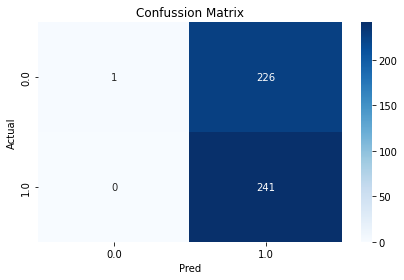

Accuracy = 0.5170940170940171
MCC = 0.04768009943174778


In [ ]:
evaluation(df_pred6)